## Image Processing

#### By: Chuang-Jan Chang
#### Ming Chi University of Technology, Taiwan

## Outline:
- Getting started with Image Processing
    - What is image processing
    - The image processing pipeline
    - 

## Getting started with Image Processing

As the name suggests, image processing can simply be defined as the processing (analyzing and manipulating) of images with algorithms in a computer (through code). It has a few different aspects, such as storage, representation, information extraction, manipulation, enhancement, restoration, and interpretation of images. 

#### What is an image and how it is stored on a computer
Conceptually, an image in its simplest form (single-channel; for example, binary or mono-chrome, grayscale or black and white images) ***is a two-dimensional function f(x,y) that maps a coordinate-pair to an integer/real value, which is related to the intensity/color of the point***. Each point is called a pixel or pel (picture element). An image can have multiple channels too (for example, colored RGB images, where a color can be represented using three channels—red, green, and blue). For a colored RGB image, each pixel at the (x,y) coordinate can be represented by a three-tuple (rx,y, gx,y, bx,y).

In order to be able to process it on a computer, an image f(x,y) needs to be digitalized both spatially and in amplitude. Digitization of the spatial coordinates (x,y) is called image sampling. Amplitude digitization is called gray-level quantization. In a computer, a pixel value corresponding to a channel is generally represented as an integer value between (0-255) or a floating-point value between (0-1). An image is stored as a file, and there can be many different types (formats) of files. Each file generally has some metadata and some data that can be extracted as multi-dimensional arrays (for example, 2-D arrays for binary or gray-level images and 3D arrays for RGB and YUV colored images). 

**Single chanel image:** Binary image and grayscale image
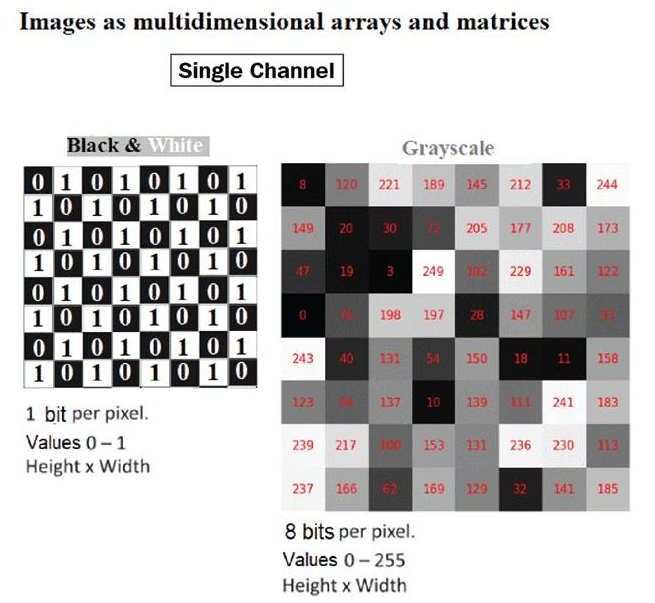

**Multi chanel image also call RGB Image requires a 3-D array of a dimension of width x height x 3**
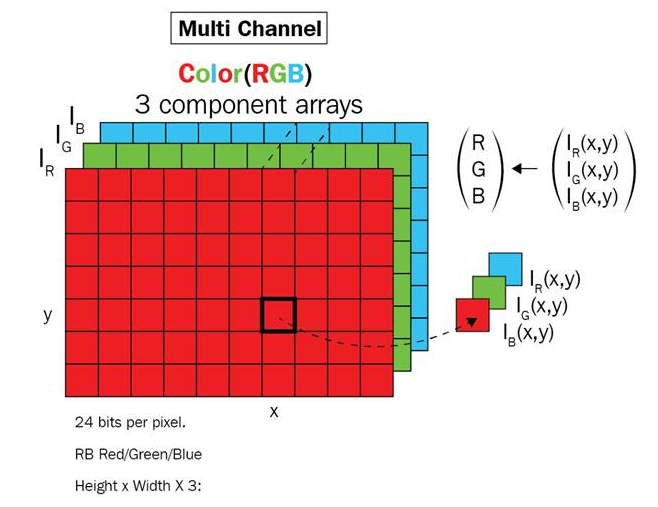

**example binary, grayscale, and RGB images**
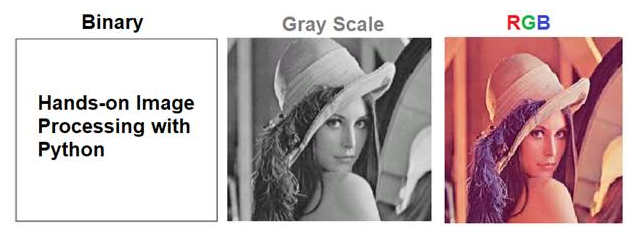

#### What is image processing?
Image processing refers to ***the automatic processing, manipulation, analysis, and interpretation of images using algorithms and codes on a computer***. It has applications in many disciplines and fields in science and technology such as television, photography, robotics, remote sensing, medical diagnosis, and industrial inspection. Social networking sites such as Facebook and Instagram, which we have got used to in our daily lives and where we upload tons of images every day, are typical examples of the industries that need to use/innovate many image processing algorithms to process the images we upload.In this book, we are going to use a few Python packages to process an image. First, we shall use a bunch of libraries to do classical image processing: right from extracting image data, transforming the data with some algorithms using library functions to pre-process, enhance, restore, represent (with descriptors), segment, classify, and detect and recognize (objects) to analyze, understand, and interpret the data better. Next, we shall use another bunch of libraries to do image processing based on deep learning, a technology that has became very popular in the last few years.

Some typical applications of image processing include medical/biological fields (for example, X-rays and CT scans), computational photography (Photoshop), fingerprint authentication, face recognition, and so on.

#### The image processing pipeline
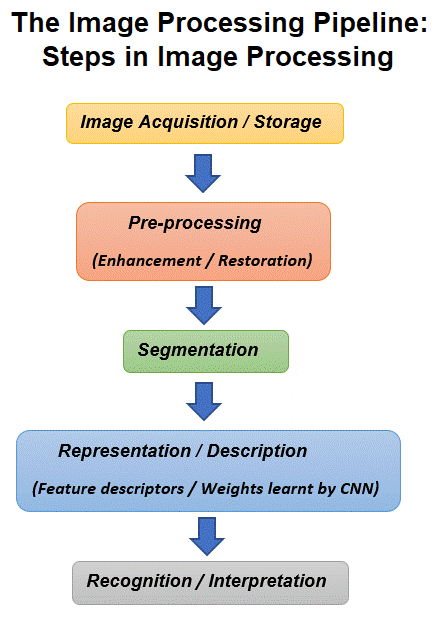

In [70]:
# import important library
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pylab as pylab
from skimage.morphology import binary_erosion, rectangle
import cv2 as cv
import numpy as np
import matplotlib.pylab as plt
import os
from PIL import Image, ImageDraw, ImageFont
import PIL.ImageFont
import PIL.ImageDraw
import skimage as skim
import skimage.transform as tr
from skimage.morphology import binary_erosion

def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off') # comment this line if you want axis ticks
    
def plot_images_horizontally(original, filtered, filter_name, sz=(18,7)):
    pylab.gray()
    pylab.figure(figsize = sz)
    pylab.subplot(1,2,1), plot_image(original, 'original')
    pylab.subplot(1,2,2), plot_image(filtered, filter_name)
    pylab.show()
    


#### Reading an image 

In [97]:
im = Image.open("./assets/parrot.jpg")
print(im.size)

(453, 340)


#### Displaying an image 

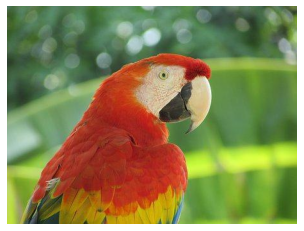

In [98]:
plt.imshow(im)
plt.axis('off')
plt.show()

#### Saving an image 

Before saving image:['.ipynb_checkpoints', 'assets', 'Chapter1.ipynb', 'grayscale.jpg', 'grayscale.png', 'teaching_material_week_1.ipynb', 'teaching_material_week_1.slides.html']
After saving image:['.ipynb_checkpoints', 'assets', 'Chapter1.ipynb', 'grayscale.jpg', 'grayscale.png', 'teaching_material_week_1.ipynb', 'teaching_material_week_1.slides.html']


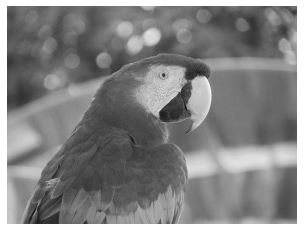

In [99]:
print("Before saving image:" + str(os.listdir(os.getcwd()))) 
img_gray = im.convert("LA")

filename = 'grayscale.png'
img_gray.save(filename) 
print("After saving image:" + str(os.listdir(os.getcwd())))   

plt.imshow(img_gray)
plt.axis('off')
plt.show()

#### Draw on image
We can draw lines or other geometric shapes on an image (for example, the ellipse() function to draw an ellipse)

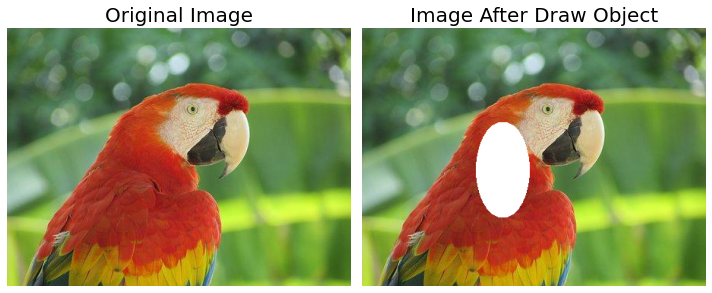

In [104]:
img = im.copy(); draw = ImageDraw.Draw(img)
draw.ellipse((150, 125, 220, 250), fill=(255,255,255,128)); del draw
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(im); plt.title("Original Image", size =20 ); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img); plt.title("Image After Draw Object", size =20 ); plt.axis('off')
plt.tight_layout(); plt.show()

#### Drawing text on image
We can add text to an image

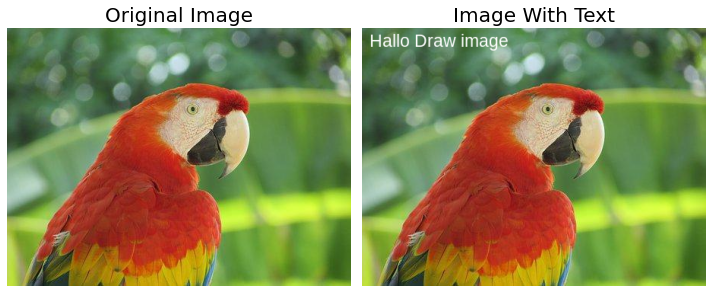

In [102]:
im_text = im.copy()
add_text = ImageDraw.Draw(im_text)
font = ImageFont.truetype("LiberationSans-Regular.ttf", 23) # use a truetype font
add_text.text((10, 5), "Hallo Draw image", font=font)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(im); plt.title("Original Image", size =20 ); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(im_text); plt.title("Image With Text", size =20 ); plt.axis('off')
plt.tight_layout(); plt.show()

#### Blending image

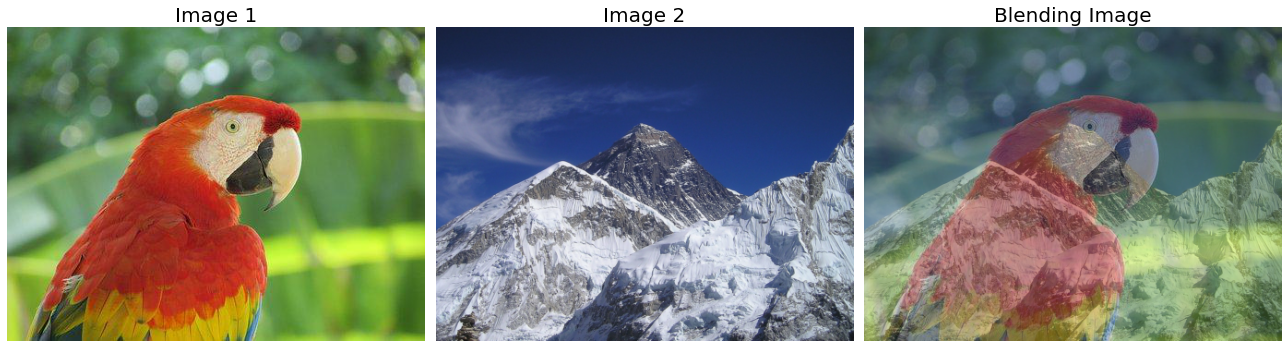

In [95]:
im1 = Image.open("./assets/parrot.png")
im2 = Image.open("./assets/hill.png")
# two images have different modes, must be converted to the same mode
im1 = im1.convert('RGBA') 
# two images have different sizes, must be converted to the same size
im2 = im2.resize((im1.width, im1.height), Image.BILINEAR) 
im_blend = Image.blend(im1, im2, alpha=0.5)
plt.figure(figsize=(18,6))
plt.subplot(1,3,1); plt.imshow(im1); plt.title("Image 1", size =20 ); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(im2); plt.title("Image 2", size =20 ); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(im_blend); plt.title("Blending Image", size =20 );plt.axis('off')
plt.tight_layout(); plt.show()

#### Resize image

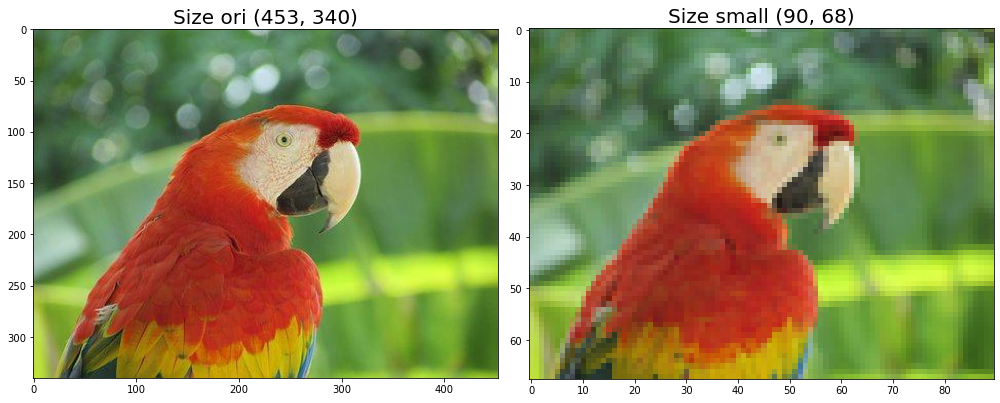

In [73]:
size_ori = str((im.width, im.height))
im_small = im.resize((im.width//5, im.height//5), Image.ANTIALIAS)
size_small = str((im_small.width, im_small.height))
plt.figure(figsize=(14,6))
plt.subplot(1,2,1); plot_image(im, title='Size ori ' + size_ori) ; plt.axis('on')
plt.subplot(1,2,2); plot_image(im_small, title='Size small ' + size_small) ; plt.axis('on')
plt.tight_layout(); plt.show()

#### Crop Image

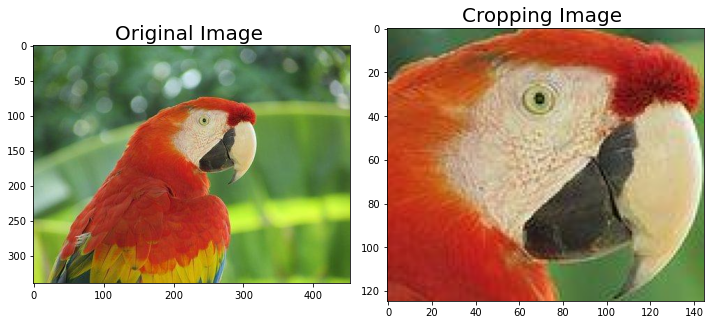

In [84]:
im_c = im.crop((175,75,320,200)) 
# crop the rectangle given by (left, top, right, bottom) from the image
# plt.imshow(im_c) ; plt.axis("off"); plt.show()
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plot_image(im, title='Original Image ' ) ; plt.axis('on')
plt.subplot(1,2,2); plot_image(im_c, title='Cropping Image ') ; plt.axis('on')
plt.tight_layout(); plt.show()

#### Separating the RGB channels of an image

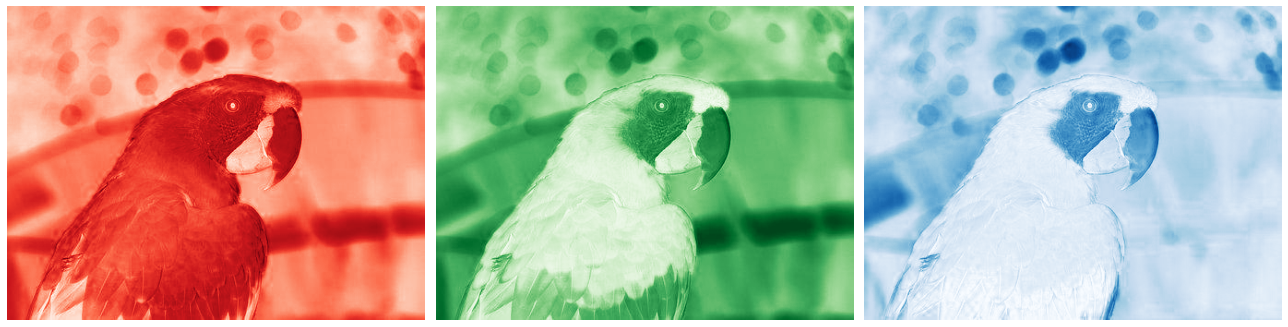

In [21]:
ch_r, ch_g, ch_b = im.split() # split the RGB image into 3 channels: R, G and B
# we shall use matplotlib to display the channels
plt.figure(figsize=(18,6))
plt.subplot(1,3,1); plt.imshow(ch_r, cmap=plt.cm.Reds); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(ch_g, cmap=plt.cm.Greens); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(ch_b, cmap=plt.cm.Blues); plt.axis('off')
plt.tight_layout()
plt.show() # show the R, G, B channels

#### Applying the swirl transform
This is a non-linear transform defined in the scikit-image documentation. The next code snippet shows how to use the swirl() function to implement the transform, where strength is a parameter to the function for the amount of swirl, radius indicates the swirl extent in pixels, and rotation adds a rotation angle. The transformation of radius into r is to ensure that the transformation decays to ≈ 1/1000th ≈ 1/1000th within the specified radius

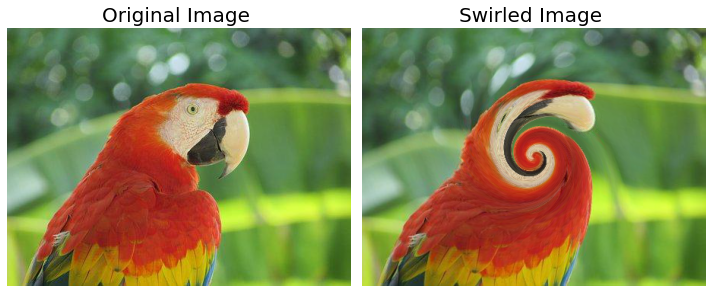

In [87]:
im = skim.io.imread("./assets/parrot.png")
swirled = tr.swirl(im, rotation=0, strength=10, radius=200)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plot_image(im, title='Original Image ' ) 
plt.subplot(1,2,2); plot_image(swirled, title='Swirled Image ') 
plt.tight_layout(); plt.show()

#### Extracting the boundary
The erosion operation can be used to extract the boundary of a binary image—we just need to subtract the eroded image from the input binary image to extract the boundary. The following code block implements this

<Figure size 432x288 with 0 Axes>

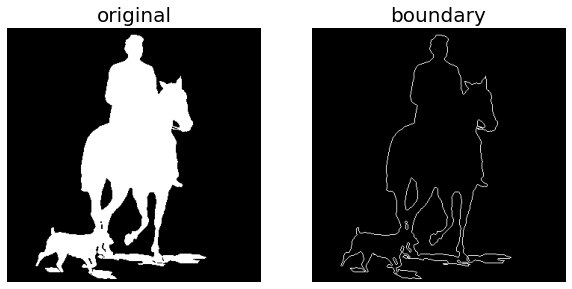

In [45]:
im = rgb2gray(imread('./assets/horse-dog.jpg'))
threshold = 0.5
im[im < threshold] = 0; im[im >= threshold] = 1
boundary = im - binary_erosion(im)
plot_images_horizontally(im, boundary, 'boundary',sz=(10,5))

### Affine Transformation

Affine Transformation helps to modify the geometric structure of the image, preserving parallelism of lines but not the lengths and angles. It preserves collinearity and ratios of distances. It is one type of method we can use in Machine Learning and Deep Learning for Image Processing and also for Image Augmentation. This technique is also used to correct Geometric Distortions and Deformations that occur with non-ideal camera angles. Ex: Satellite Imagery.

The Affine Transformation relies on matrices to handle rotation, shear, translation and scaling.[[1]](https://medium.com/mlait/affine-transformation-image-processing-in-tensorflow-part-1-df96256928a)

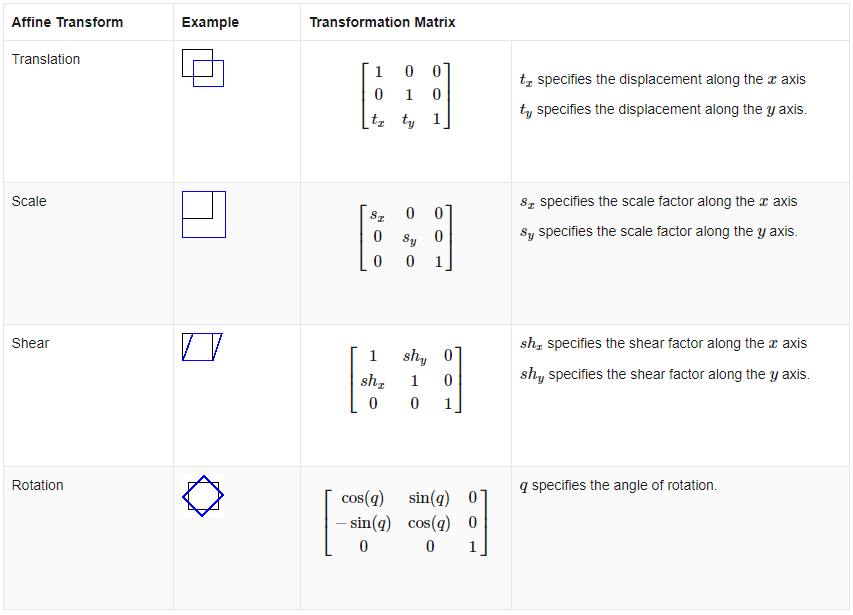

#### 1. Translation
A translation is a function that moves every point with a constant distance in a specified direction. In TensorFlow, it is specified as tx and ty which will provide the orientation and the distance.

- tx: Width shift.
- ty: Heigh shift.

So after specifying the values of tx and ty, we can get our desired result.

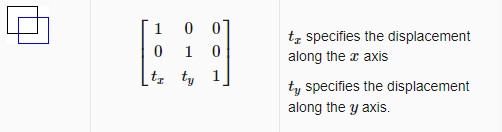

In [ ]:
import keras
import tensorflow
transformation = tf.keras.preprocessing.image.apply_affine_transform(img, tx=30, ty=30 )
plt.imshow(transformation)
plt.axis('off')

#### 2. Rotation
Rotation is a circular transformation around a point or an axis. We can specify the angle of rotation to rotate our image around a point or an axis.

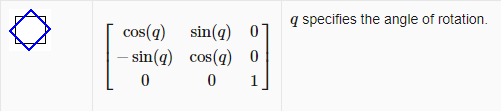

We can mention the value of theta in degrees for implementing in Tensorflow.
- theta: Rotation angle in degrees.


#### 3. Scaling
Scaling is a linear transformation that enlarges or shrinks objects by a scale factor that is the same in all directions. We can specify the values of the sx and sy to enlarge or shrink our images. It is basically zooming in the image or zooming out the image.
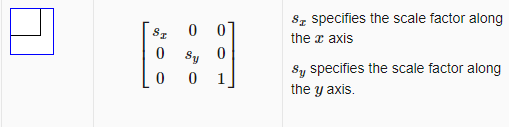
- *zx: Zoom in x direction.*
- *zy: Zoom in y direction*

#### 4. Shear
Shear is sometimes also referred to as transvection. A transvection is a function that shifts every point with constant distance in a basis direction(x or y).
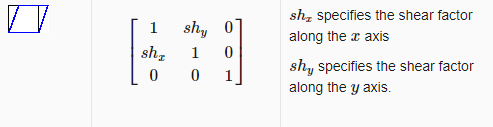



### Mophological Image Processing
Morphological image processing is a collection of non-linear operations related to the shape or morphology of features in an image. These operations are particularly suited to the processing of binary images (where pixels are represented as 0 or 1 and, by convention, the foreground of the object = 1 or white and the background = 0 or black), although it can be extended to grayscale images.


In morphological operations, a structuring element (a small template image) is used to probe the input image. The algorithms work by positioning the structuring element at all possible locations in the input image and comparing it with the corresponding neighborhood of the pixels with a set operator. Some operations test whether the element fits within the neighborhood, while others test whether it hits or intersects the neighborhood. A few popular morphological operators or filters are binary dilation and erosion, opening and closing, thinning, skeletonizing, morphological edge detectors, hit or miss filters, rank filters, median filters, and majority filters.

#### 1. Erosion 

<Figure size 432x288 with 0 Axes>

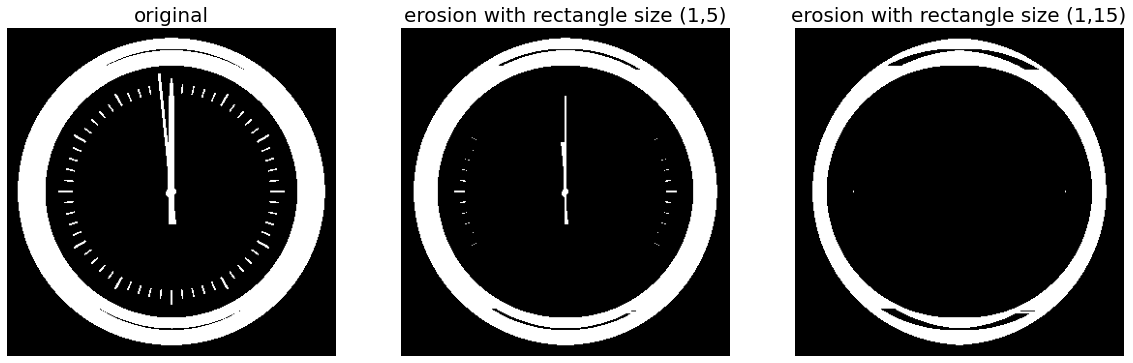

In [106]:
im = rgb2gray(imread('clock2.jpg'))
im[im <= 0.5] = 0 # create binary image with fixed threshold 0.5
im[im > 0.5] = 1
pylab.gray()
pylab.figure(figsize=(20,10))
pylab.subplot(1,3,1), plot_image(im, 'original')
im1 = binary_erosion(im, rectangle(1,5))
pylab.subplot(1,3,2), plot_image(im1, 'erosion with rectangle size (1,5)')
im1 = binary_erosion(im, rectangle(1,15))
pylab.subplot(1,3,3), plot_image(im1, 'erosion with rectangle size (1,15)')
pylab.show()

#### 2. Dilation

<Figure size 432x288 with 0 Axes>

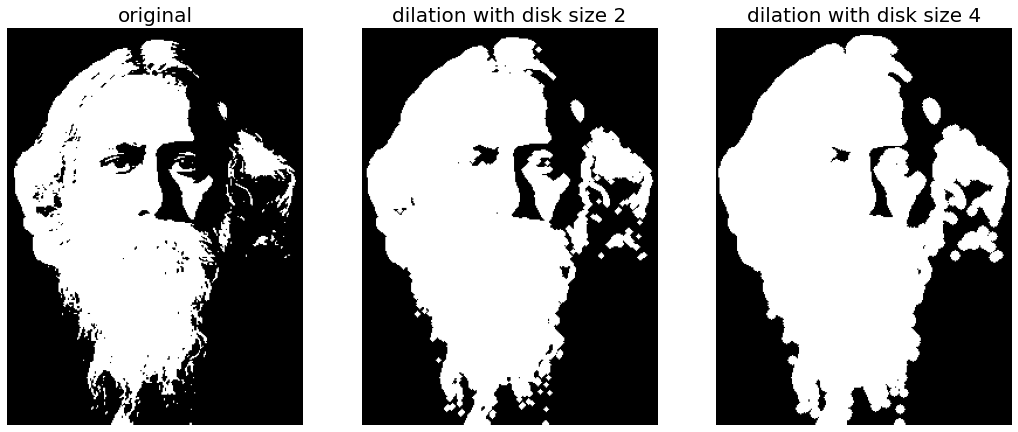

In [108]:
from skimage.morphology import binary_dilation, disk
from skimage import img_as_float
im = img_as_float(imread('tagore.png'))
im = 1 - im[...,3]
im[im <= 0.5] = 0
im[im > 0.5] = 1
pylab.gray()
pylab.figure(figsize=(18,9))
pylab.subplot(131)
pylab.imshow(im)
pylab.title('original', size=20)
pylab.axis('off')
for d in range(1,3):
    pylab.subplot(1,3,d+1)
    im1 = binary_dilation(im, disk(2*d))
    pylab.imshow(im1)
    pylab.title('dilation with disk size ' + str(2*d), size=20)
    pylab.axis('off')
pylab.show() 

<Figure size 432x288 with 0 Axes>

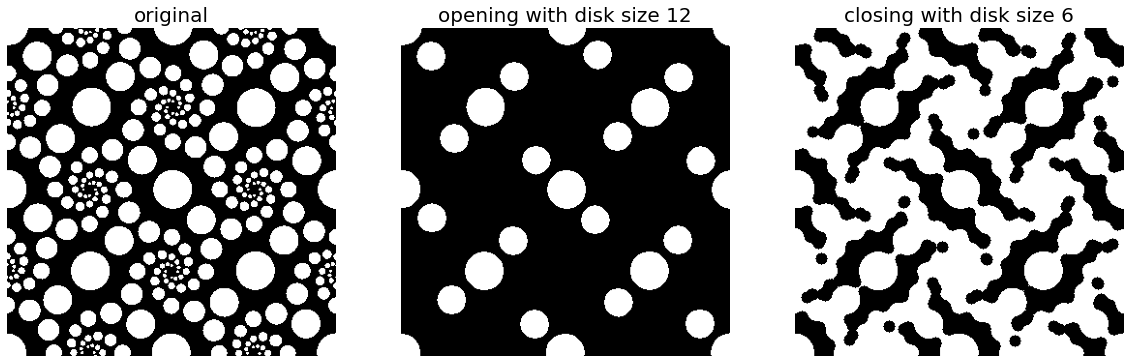

In [109]:
from skimage.morphology import binary_opening, binary_closing, binary_erosion, binary_dilation, disk
im = rgb2gray(imread('circles.jpg'))
im[im <= 0.5] = 0
im[im > 0.5] = 1
pylab.gray()
pylab.figure(figsize=(20,10))
pylab.subplot(1,3,1), plot_image(im, 'original')
im1 = binary_opening(im, disk(12))
pylab.subplot(1,3,2), plot_image(im1, 'opening with disk size ' + str(12))
im1 = binary_closing(im, disk(6))
pylab.subplot(1,3,3), plot_image(im1, 'closing with disk size ' + str(6))
pylab.show()

In [112]:
def plot_images_horizontally(original, filtered, filter_name, sz=(18,7)):
    pylab.gray()
    pylab.figure(figsize = sz)
    pylab.subplot(1,2,1), plot_image(original, 'original')
    pylab.subplot(1,2,2), plot_image(filtered, filter_name)
    pylab.show()

<Figure size 432x288 with 0 Axes>

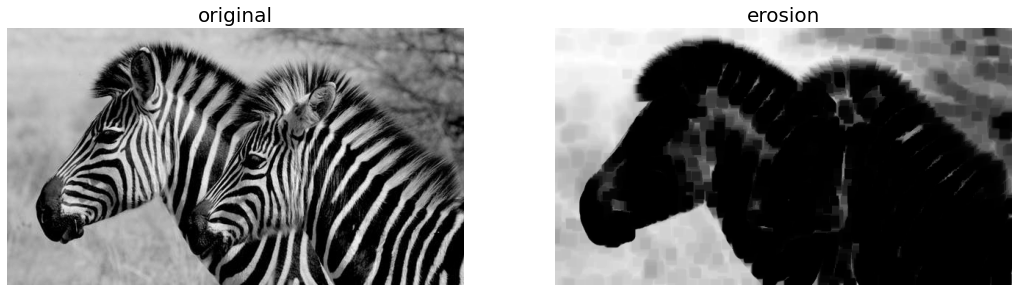

In [120]:
from skimage.morphology import dilation, erosion, closing, opening, square
im = imread('zebras.jpg')
im = rgb2gray(im)
struct_elem = square(12)
eroded = erosion(im, struct_elem)
plot_images_horizontally(im, eroded, 'erosion')

<Figure size 432x288 with 0 Axes>

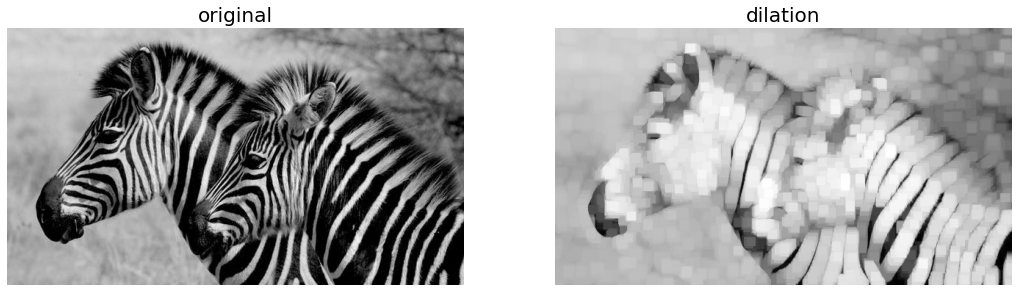

In [121]:
dilated = dilation(im, struct_elem)
plot_images_horizontally(im, dilated, 'dilation')

#### 3. Opening

<Figure size 432x288 with 0 Axes>

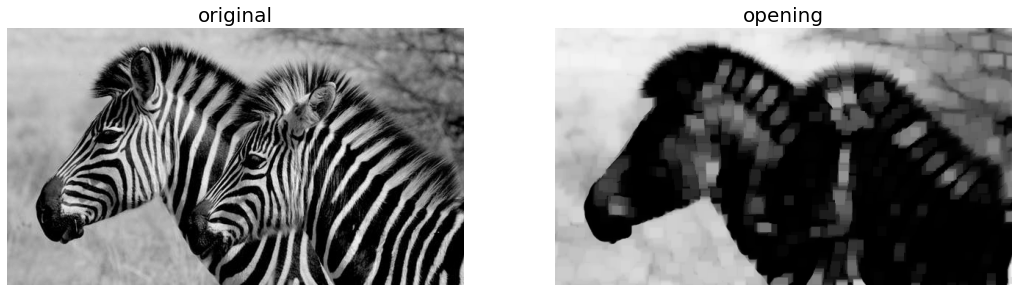

In [122]:
opened = opening(im, struct_elem)
plot_images_horizontally(im, opened, 'opening')

#### 4. Closing

<Figure size 432x288 with 0 Axes>

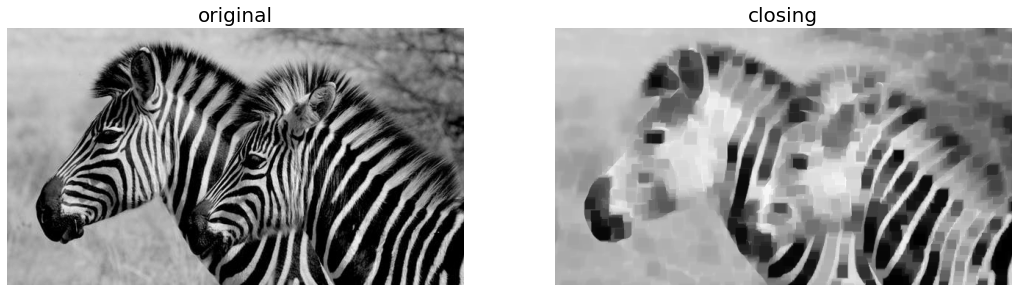

In [123]:
closed = closing(im, struct_elem)
plot_images_horizontally(im, closed, 'closing')

#### 5. Removing small objects

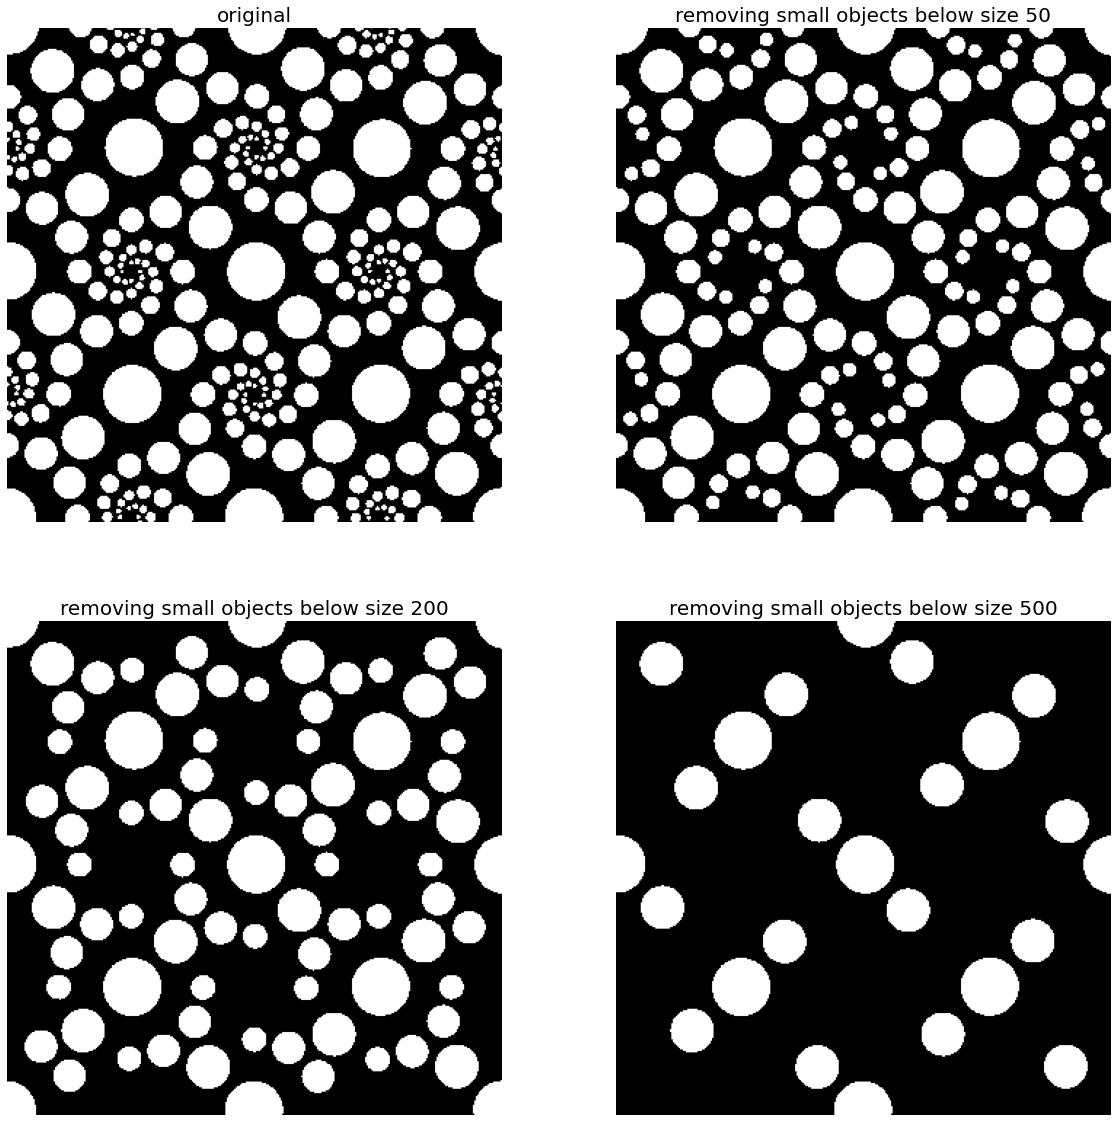

In [124]:
from skimage.morphology import remove_small_objects
im = rgb2gray(imread('circles.jpg'))
im[im > 0.5] = 1 # create binary image by thresholding with fixed threshold
0.5
im[im <= 0.5] = 0
im = im.astype(np.bool)
pylab.figure(figsize=(20,20))
pylab.subplot(2,2,1), plot_image(im, 'original')
i = 2
for osz in [50, 200, 500]:
    im1 = remove_small_objects(im, osz, connectivity=1)
    pylab.subplot(2,2,i), plot_image(im1, 'removing small objects below size ' + str(osz))
    i += 1
pylab.show()

## Reference
1. [Linear mapping method using affine transformation](https://www.mathworks.com/discovery/affine-transformation.html#:~:text=Affine%20transformation%20is%20a%20linear,with%20non%2Dideal%20camera%20angles.)
2. https://medium.com/@evergreenllc2020/fundamentals-of-image-processing-98202ee8f162
3. https://medium.com/@delightful_Kdub/image-manipulation-with-processing3-c52ec08bbf27
4. https://medium.com/mlait/affine-transformation-image-processing-in-tensorflow-part-1-df96256928a
6. https://towardsdatascience.com/a-hands-on-application-of-homography-ipm-18d9e47c152f
7. https://medium.com/learning-machine-learning/present-your-data-science-projects-with-jupyter-slides-75f20735eb0f
8. https://learning.oreilly.com/library/view/hands-on-image-processing/9781789343731/1ea6e554-a842-4277-a5c0-430b04c59d98.xhtml


## Next lecture
- face recognition
- github for development project